Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.80000

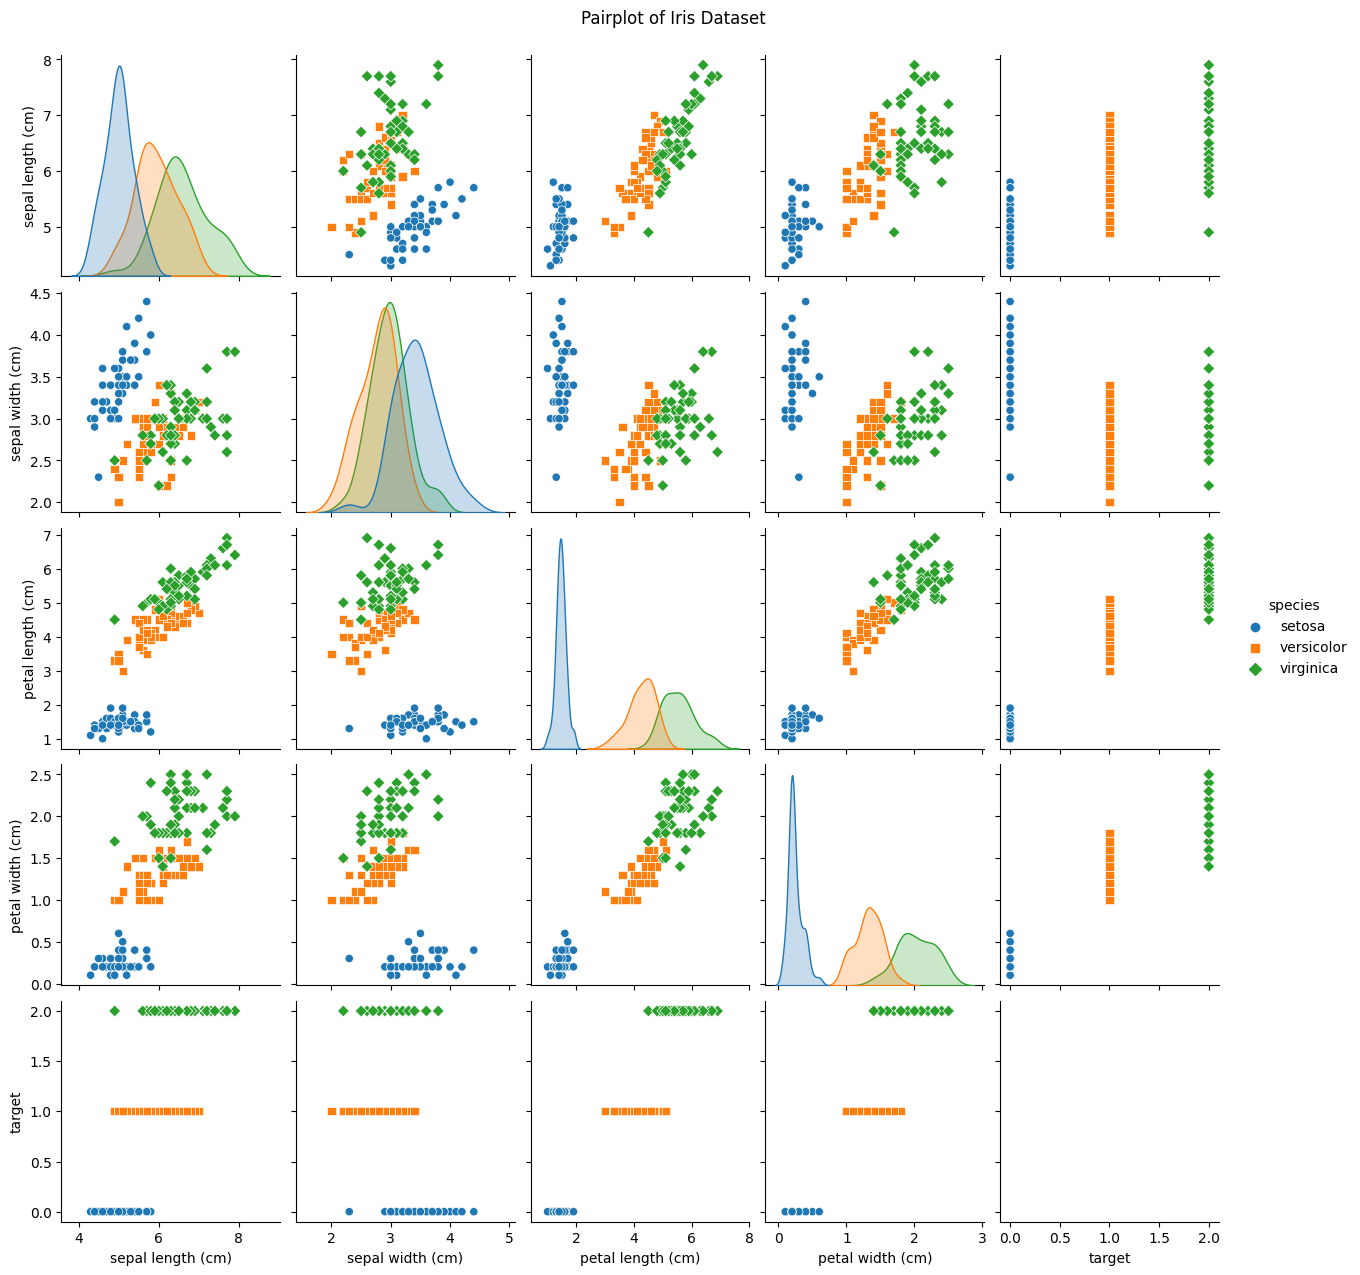

Epoch 1/50
8/8 [==============================] - 1s 5ms/step - loss: 1.4580 - accuracy: 0.0833
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 1.4118 - accuracy: 0.1167
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 1.3673 - accuracy: 0.1333
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 1.3277 - accuracy: 0.1417
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 1.2881 - accuracy: 0.1667
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 1.2543 - accuracy: 0.1917
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 1.2208 - accuracy: 0.2000
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 1.1899 - accuracy: 0.2083
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 1.1619 - accuracy: 0.2083
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 1.1356 - accuracy: 0.2167
Epoch 11/50
8/8 [======================

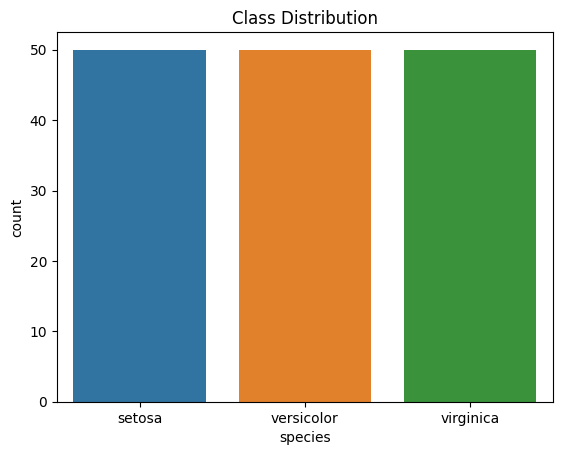

<ipython-input-1-aa69cb123de1>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=subset_df.drop(columns=['target', 'species']), ci='sd')


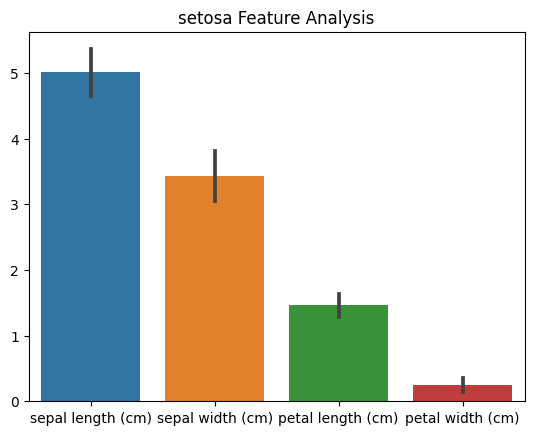

<ipython-input-1-aa69cb123de1>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=subset_df.drop(columns=['target', 'species']), ci='sd')


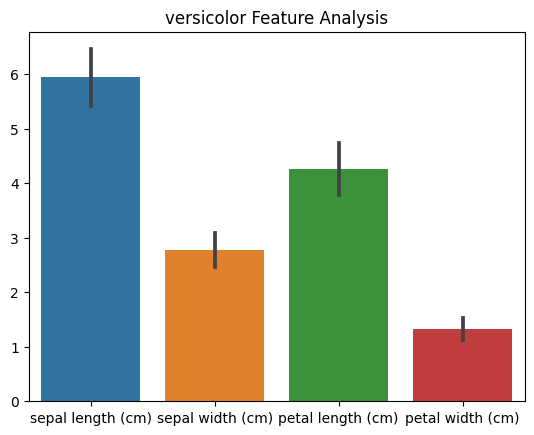

<ipython-input-1-aa69cb123de1>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=subset_df.drop(columns=['target', 'species']), ci='sd')


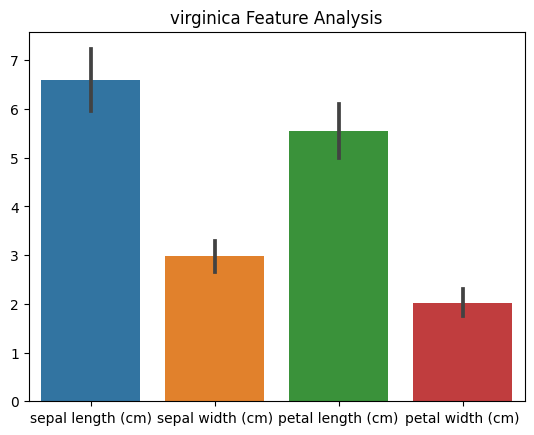

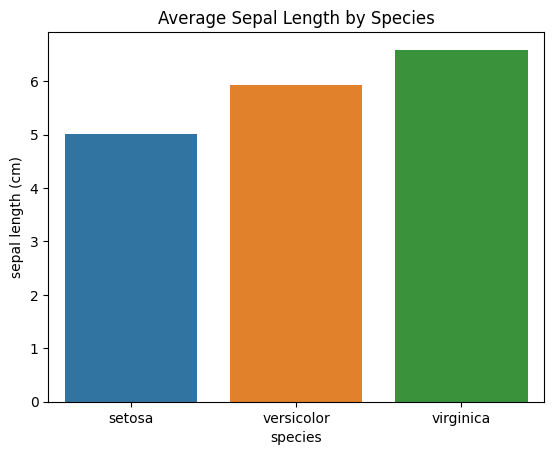

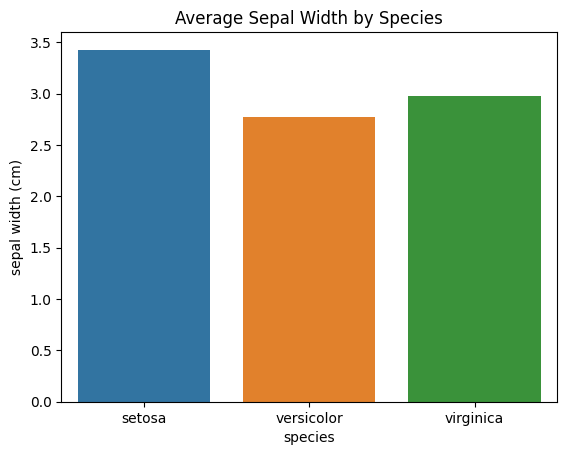

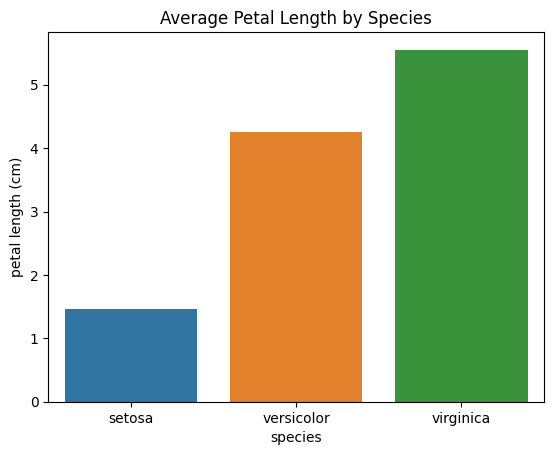

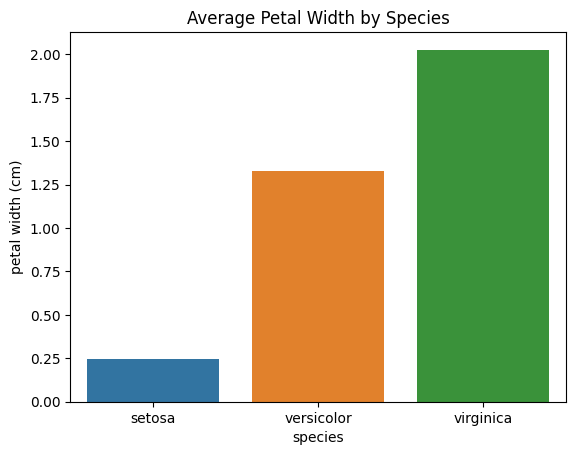

In [1]:
# Install required libraries
# pip install scikit-learn tensorflow seaborn matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert the data to a Pandas DataFrame for analysis
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Explore the data
print("Dataset Overview:")
print(iris_df.head())
print("\nDataset Statistics:")
print(iris_df.describe())
print("\nClass Distribution:")
print(iris_df['species'].value_counts())

# Visualize the entire dataset
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network with TensorFlow's Keras API
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris['target_names']))

# Visualize the distribution of classes using a bar graph
sns.countplot(x='species', data=iris_df)
plt.title('Class Distribution')
plt.show()

# Analyze feature importance for each species
for species in iris_df['species'].unique():
    subset_df = iris_df[iris_df['species'] == species]
    sns.barplot(data=subset_df.drop(columns=['target', 'species']), ci='sd')
    plt.title(f'{species} Feature Analysis')
    plt.show()

# Plot the average of the iris classification features
average_features = iris_df.groupby('species').mean()
average_features = average_features.drop(columns=['target']).reset_index()
sns.barplot(x='species', y='sepal length (cm)', data=average_features)
plt.title('Average Sepal Length by Species')
plt.show()

sns.barplot(x='species', y='sepal width (cm)', data=average_features)
plt.title('Average Sepal Width by Species')
plt.show()

sns.barplot(x='species', y='petal length (cm)', data=average_features)
plt.title('Average Petal Length by Species')
plt.show()

sns.barplot(x='species', y='petal width (cm)', data=average_features)
plt.title('Average Petal Width by Species')
plt.show()
